# Text Classification 

## Text Classification Workflow 
https://developers.google.cn/machine-learning/guides/text-classification/  
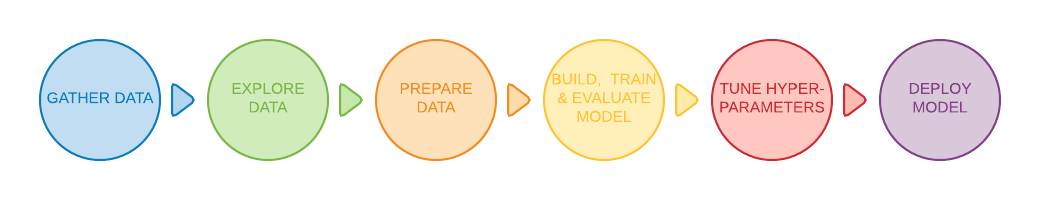

### explore data
实现见：mayiutils/nlp/nlp_explore_data.py  
Number of samples: Total number of examples you have in the data.

Number of classes: Total number of topics or categories in the data.

__Number of samples per class__: Number of samples per class (topic/category). In a balanced dataset, all classes will have a similar number of samples; in an imbalanced dataset, the number of samples in each class will vary widely.

Number of words per sample: __Median number of words in one sample__.

__Frequency distribution of words__: Distribution showing the frequency (number of occurrences) of each word in the dataset.

__Distribution of sample length__: Distribution showing the number of words per sample in the dataset.

### Choose a Model
此时，我们已经汇总了数据集，并深入了解了数据的关键特征。 接下来，根据我们在第2步中收集的指标，我们应该考虑应该使用哪种分类模型。 这意味着/提出问题，例如“我们如何将文本数据呈现给期望数字输入的算法？”（这称为数据预处理和矢量化），“我们应该使用什么类型的模型？”，“什么配置参数 我们应该使用我们的模型吗？“等

经过数十年的研究，我们可以访问大量的数据预处理和模型配置选项。 然而，可供选择的大量可行选项的可用性极大地增加了手头的特定问题的复杂性和范围。 鉴于最佳选择可能并不明显，一个天真的解决方案是尽力尝试每一种可能的选择，通过直觉修剪一些选择。 然而，这将是非常昂贵的。

在本指南中，我们尝试显着简化选择文本分类模型的过程。 对于给定的数据集，我们的目标是找到实现接近最大精度的算法，同时最小化训练所需的计算时间。 我们针对不同类型的问题（特别是情感分析和主题分类问题）运行了大量（~450K）实验，使用12个数据集，交替用于不同数据预处理技术和不同模型体系结构之间的每个数据集。 这有助于我们识别影响最佳选择的数据集参数。

下面的模型选择算法和流程图是我们实验的总结。 如果您还不理解其中使用的所有术语，请不要担心; 本指南的以下部分将对其进行深入解释。  
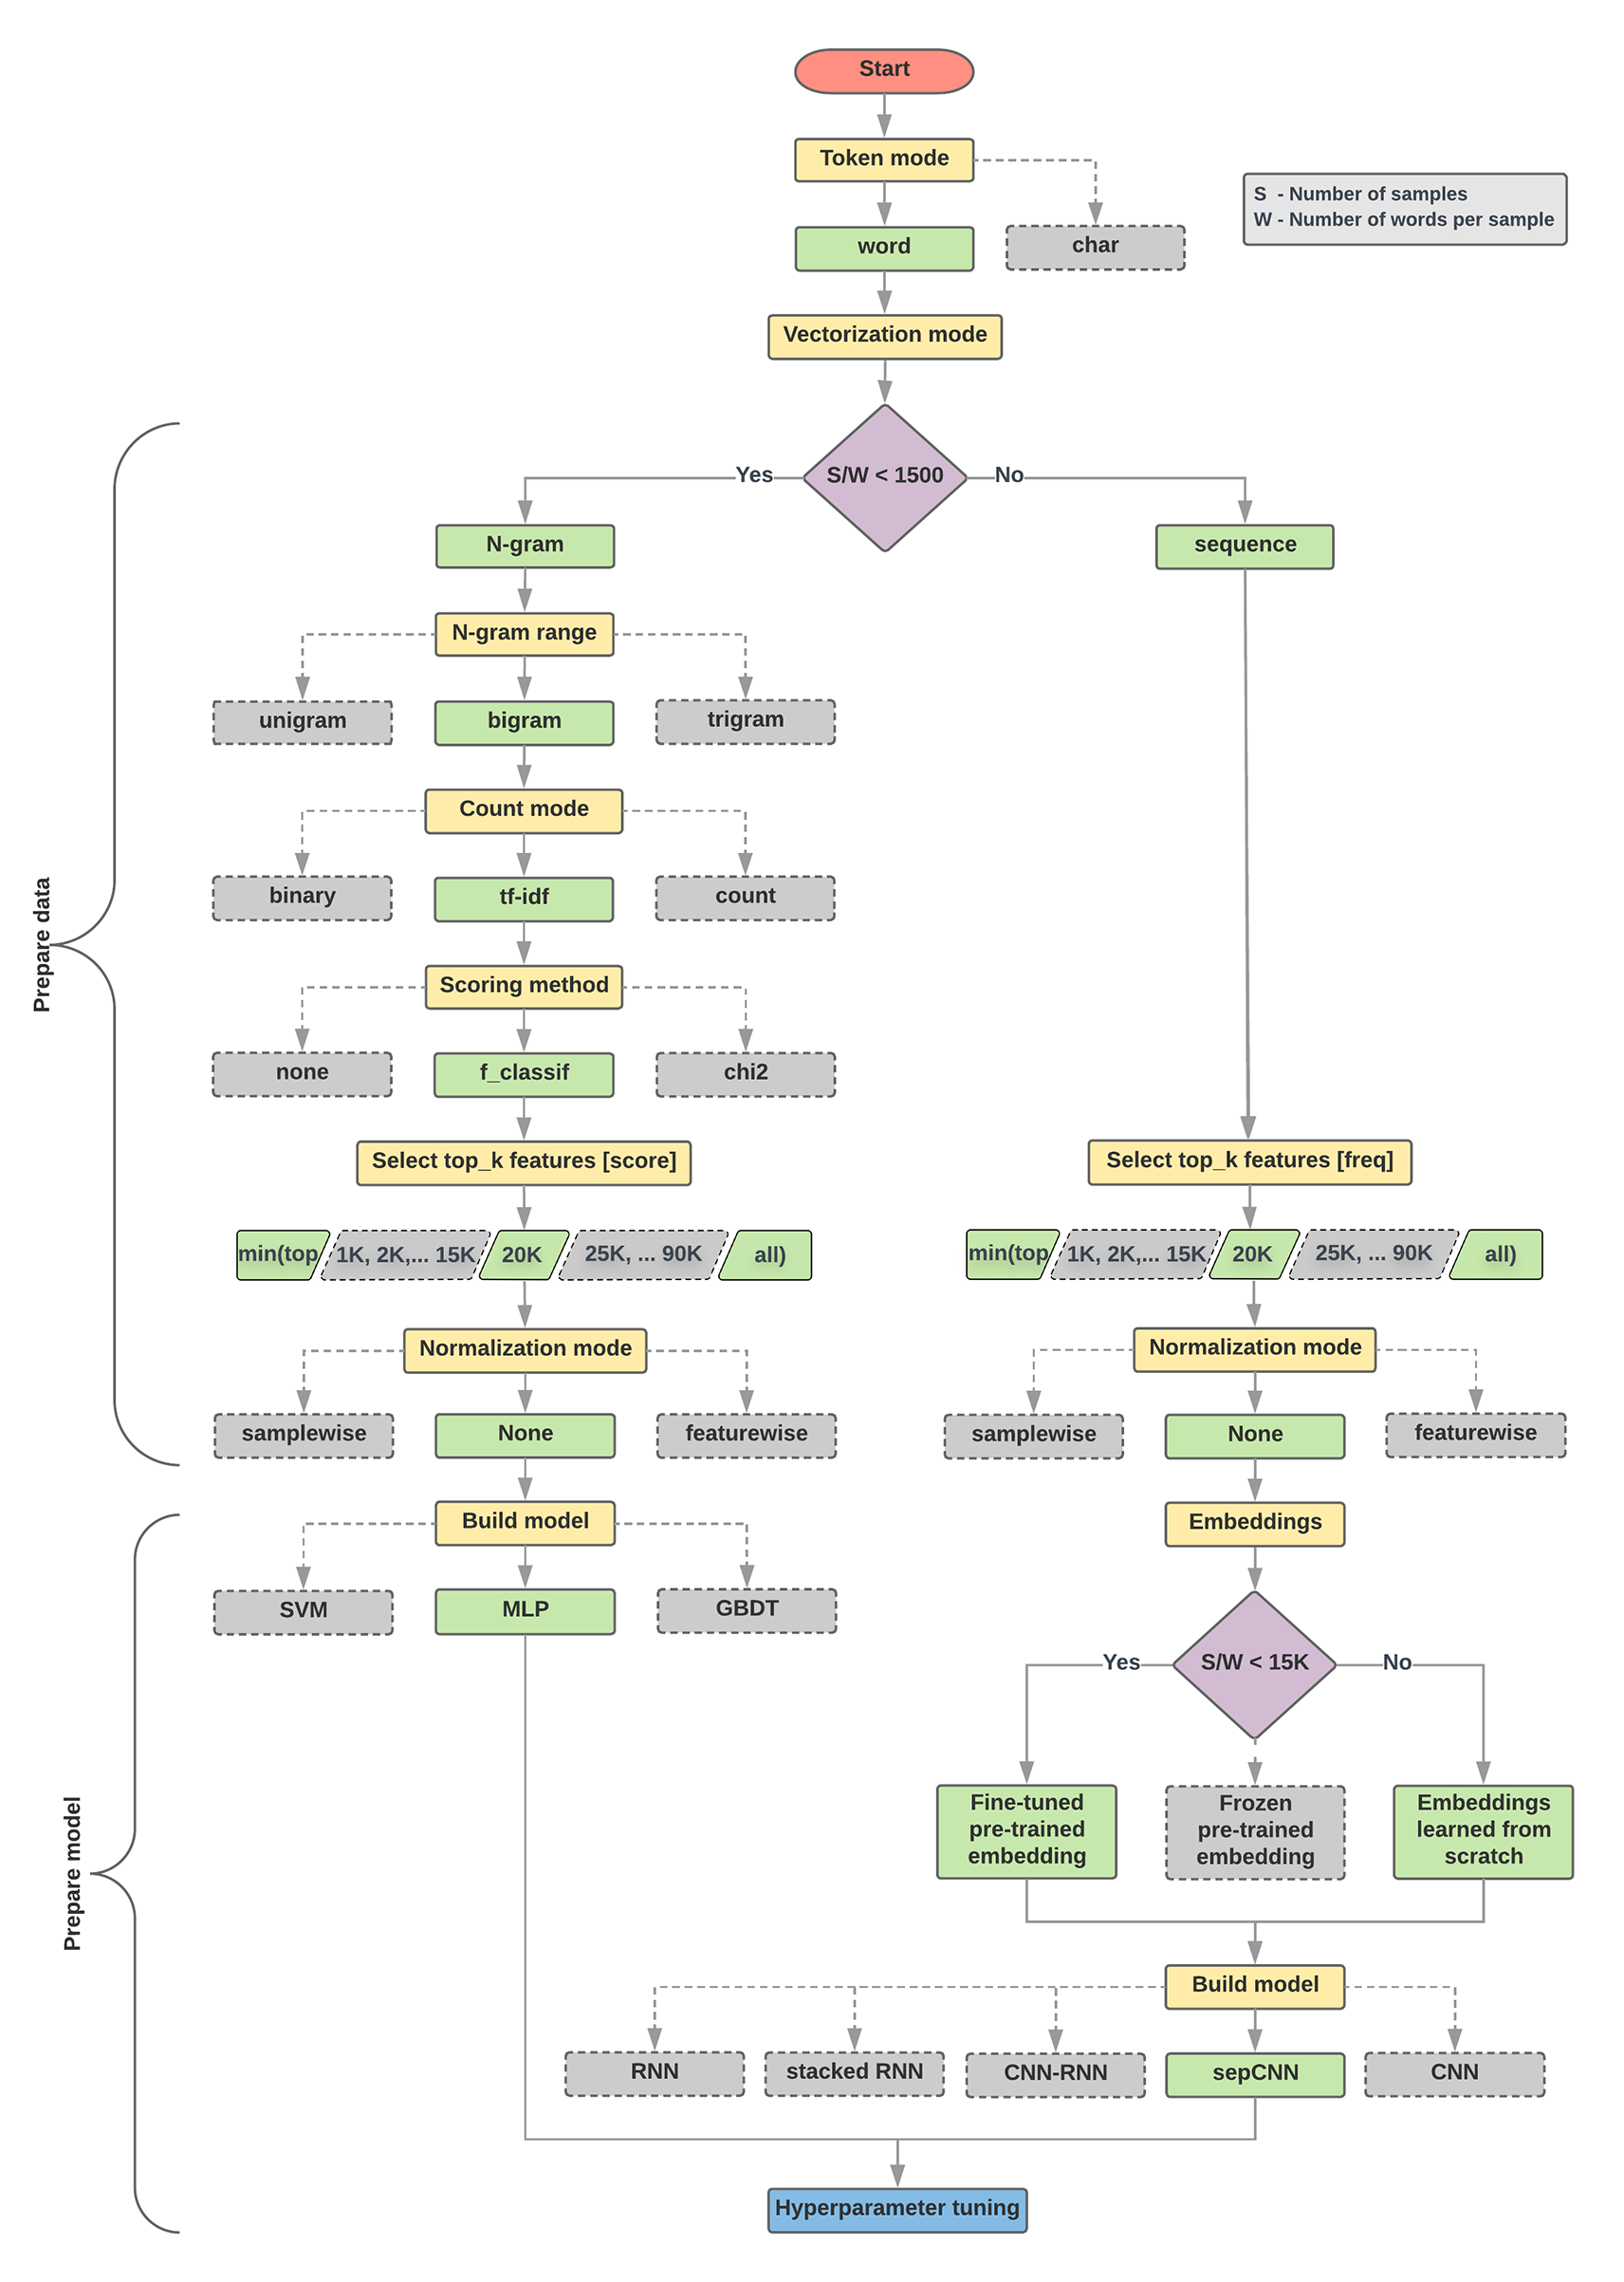

# examples1影评文本分类 tf.keras 2分类

https://tensorflow.google.cn/tutorials/keras/basic_text_classification

GlobalAveragePooling1D
https://tensorflow.google.cn/api_docs/python/tf/keras/layers/GlobalAveragePooling1D

https://blog.csdn.net/qq_23304241/article/details/80292859



绘图技巧

In [18]:
import tensorflow as tf
from tensorflow import keras

import numpy as np

print(tf.__version__)

1.14.0


In [2]:
imdb = keras.datasets.imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

### 探索数据
我们将使用 IMDB 数据集，其中包含来自互联网电影数据库的 50000 条影评文本。我们将这些影评拆分为训练集（25000 条影评）和测试集（25000 条影评）。训练集和测试集之间达成了平衡，意味着它们包含相同数量的正面和负面影评。

In [3]:
print("Training entries: {}, labels: {}".format(len(train_data), len(train_labels)))

Training entries: 25000, labels: 25000


In [4]:
print(train_data[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [5]:
len(train_data[0]), len(train_data[1])

(218, 189)

### 将整数转换回字词

In [6]:
# A dictionary mapping words to an integer index
word_index = imdb.get_word_index()
word_index

{'fawn': 34701,
 'tsukino': 52006,
 'nunnery': 52007,
 'sonja': 16816,
 'vani': 63951,
 'woods': 1408,
 'spiders': 16115,
 'hanging': 2345,
 'woody': 2289,
 'trawling': 52008,
 "hold's": 52009,
 'comically': 11307,
 'localized': 40830,
 'disobeying': 30568,
 "'royale": 52010,
 "harpo's": 40831,
 'canet': 52011,
 'aileen': 19313,
 'acurately': 52012,
 "diplomat's": 52013,
 'rickman': 25242,
 'arranged': 6746,
 'rumbustious': 52014,
 'familiarness': 52015,
 "spider'": 52016,
 'hahahah': 68804,
 "wood'": 52017,
 'transvestism': 40833,
 "hangin'": 34702,
 'bringing': 2338,
 'seamier': 40834,
 'wooded': 34703,
 'bravora': 52018,
 'grueling': 16817,
 'wooden': 1636,
 'wednesday': 16818,
 "'prix": 52019,
 'altagracia': 34704,
 'circuitry': 52020,
 'crotch': 11585,
 'busybody': 57766,
 "tart'n'tangy": 52021,
 'burgade': 14129,
 'thrace': 52023,
 "tom's": 11038,
 'snuggles': 52025,
 'francesco': 29114,
 'complainers': 52027,
 'templarios': 52125,
 '272': 40835,
 '273': 52028,
 'zaniacs': 52130,

In [7]:
# The first indices are reserved  前面的几个索引被保留
word_index = {k:(v+3) for k,v in word_index.items()}
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNK>"] = 2  # unknown
word_index["<UNUSED>"] = 3

reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

In [8]:
decode_review(train_data[0])

"<START> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert <UNK> is an amazing actor and now the same being director <UNK> father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for <UNK> and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also <UNK> to the two little boy's that played the <UNK> of norman and paul they were just brilliant children are often left out of the <UNK> list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for wh

In [9]:
import sys
sys.path.append('/Users/luoyonggui/PycharmProjects/mayiutils_n1/mayiutils/nlp')

In [10]:
from nlp_explore_data import get_num_classes, get_num_words_per_sample, plot_class_distribution, plot_frequency_distribution_of_ngrams, plot_sample_length_distribution

In [11]:
get_num_classes(train_labels)

2

In [12]:
corpus = list(map(decode_review, train_data))

In [13]:
corpus[:1]

["<START> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert <UNK> is an amazing actor and now the same being director <UNK> father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for <UNK> and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also <UNK> to the two little boy's that played the <UNK> of norman and paul they were just brilliant children are often left out of the <UNK> list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for w

In [14]:
get_num_words_per_sample(corpus)

178.0

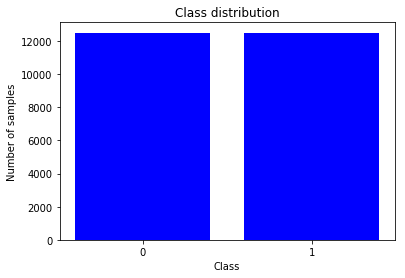

In [15]:
plot_class_distribution(train_labels)

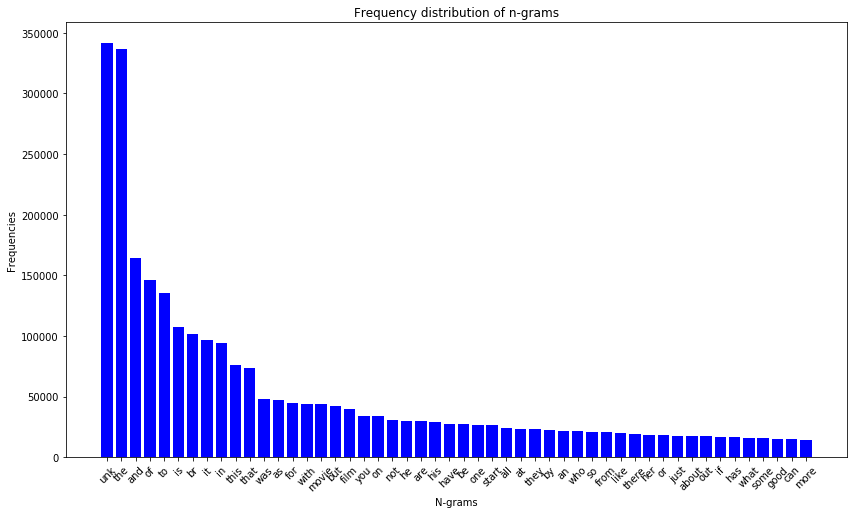

In [16]:
plot_frequency_distribution_of_ngrams(corpus)

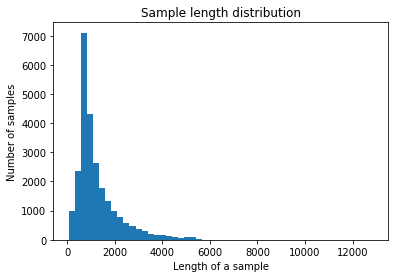

In [17]:
plot_sample_length_distribution(corpus)

### 准备数据

In [10]:
train_data = keras.preprocessing.sequence.pad_sequences(train_data,
                                                        value=word_index["<PAD>"],
                                                        padding='post',
                                                        maxlen=256)

test_data = keras.preprocessing.sequence.pad_sequences(test_data,
                                                       value=word_index["<PAD>"],
                                                       padding='post',
                                                       maxlen=256)

### 构建模型

In [11]:
# input shape is the vocabulary count used for the movie reviews (10,000 words)
vocab_size = 10000

model = keras.Sequential()
model.add(keras.layers.Embedding(vocab_size, 16))
model.add(keras.layers.GlobalAveragePooling1D())
model.add(keras.layers.Dense(16, activation=tf.nn.relu))
model.add(keras.layers.Dense(1, activation=tf.nn.sigmoid))

model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 16)          160000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 16)                272       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 160,289
Trainable params: 160,289
Non-trainable params: 0
_________________________________________________________________


### 损失函数和优化器

In [12]:
model.compile(optimizer=tf.train.AdamOptimizer(),
              loss='binary_crossentropy',
              metrics=['accuracy'])

### 创建验证集

In [14]:
x_val = train_data[:10000]
partial_x_train = train_data[10000:]

y_val = train_labels[:10000]
partial_y_train = train_labels[10000:]

In [15]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=40,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=1)

Train on 15000 samples, validate on 10000 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/40
15000/15000 [==============================] - 1s 40us/sample - loss: 0.6916 - acc: 0.5587 - val_loss: 0.6888 - val_acc: 0.6715
Epoch 2/40
15000/15000 [==============================] - 0s 23us/sample - loss: 0.6844 - acc: 0.7057 - val_loss: 0.6792 - val_acc: 0.7390
Epoch 3/40
15000/15000 [==============================] - 0s 20us/sample - loss: 0.6695 - acc: 0.7487 - val_loss: 0.6609 - val_acc: 0.7437
Epoch 4/40
15000/15000 [==============================] - 0s 20us/sample - loss: 0.6446 - acc: 0.7675 - val_loss: 0.6328 - val_acc: 0.7478
Epoch 5/40
15000/15000 [==============================] - 0s 22us/sample - loss: 0.6091 - acc: 0.7938 - val_loss: 0.5962 - val_acc: 0.7856
Epoch 6/40
15000/15000 [==============================] - 0s 21us/sample - loss: 0.5648 - acc: 0.8179 - val_loss: 0.5535 - val_acc: 0.8133
Epoch 7/40
15000/15000 [==============================] - 0s 24us/sa

### 评估模型

In [16]:
results = model.evaluate(test_data, test_labels)

print(results)

25000/25000 [==============================] - 1s 21us/sample - loss: 0.3361 - acc: 0.8712
[0.33612201169967654, 0.87124]


### 创建准确率和损失随时间变化的图

In [17]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

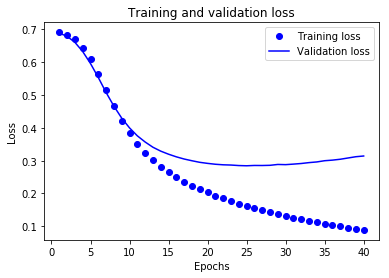

In [20]:
%matplotlib inline

import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

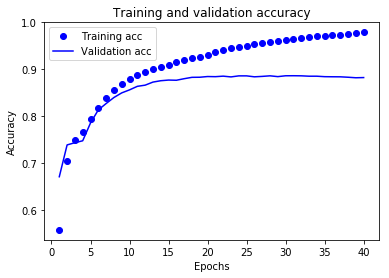

In [21]:
plt.clf()   # clear figure
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

# exp2: CCF BDCI新闻情感分类初赛A榜4/2735，复赛1%题解报告 
https://mp.weixin.qq.com/s/oRJiSxa-f_4npdLNYbjFPQ

本文将带来CCF BDCI新闻情感分类的题解报告，该方案在初赛A榜获得了4/2735，复赛成绩1%。希望可以给大家提供一些思路，互相交流学习。


比赛代码已经开源在https://github.com/linhaow/TextClassify

赛题说明


比赛的链接在这里：

https://www.datafountain.cn/competitions/350

比赛的内容是互联网的新闻情感分析。给定新闻标题和新闻的内容，然后需要我们设计一个方案对新闻的情感进行分类，判断新闻是消极的，积极的还是中立的。


## 训练数据集的字段如下：

id：新闻的唯一标识。

title：新闻的题目。

content：新闻的内容。

label：情感分类的标签。


## 数据分析


一个好的数据分析可以给比赛带来很大的提升。所以数据分析的过程不能忽视。对训练数据集分析后，可以发现训练集有如下一些特征。

（1）训练数据集中0标签的数据量比较少，只有几百。

（2）训练集中1和2的标签比较平衡，都是几千，相差不大。

（3）此外新闻的文章内容很长，很多有上千个字。

（4）相比于新闻内容，新闻标题较短，很少有上百字的标题。

针对上述特征，可以看出标签中存在一定的数据不均衡，此外如何处理过长的文章内容也是一个核心任务。对于常用的bert模型，只能接收512个token，所以需要一个能处理过千字的文章内容的方法。


## baseline

我刚参加比赛的时候初赛已经过去了一段时间了，当时有一个郭大开源的baseline，我的baseline是基于这个开源baseline修改的。baseline的结构图如下：
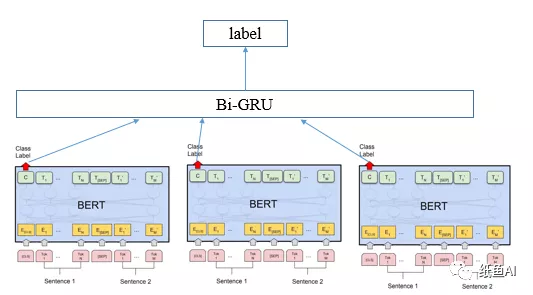

### 模型第一部分
整个模型由两个部分组成。


（1）第一部分是最下方的split_num个bert模型（这里可以使用bert全家桶中的任意一个），现在基本文本分类比赛的前排都是bert模型。毕竟bert模型在预训练的时候就加入了很多比赛外的数据。所以相对来说效果也不会太差。


为了同时利用标题和文章内容信息，在bert模型的输入端。

我选用了两个sentence加[SEP]做为模型的输入，其中sentence1是该新闻的标题，而sentence2则是该新闻的内容的一部分。

为了让新闻内容可以覆盖到整篇文章，我首先将文章分成split_num段，然后在每一段选择maxlen的长度，分别做为split_num个bert模型sentence2的输入。


举个例子，如果下面的长方形代表的是一个文章的内容，而split_num是3，则三颗五角星的地方是三个bert的sentence2的输入。sentence1均是文章标题。
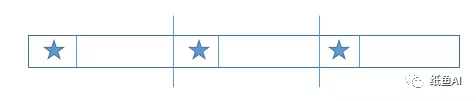

### 模型第二部分
2）第二部分是上方的biGRU模块。该模块将bert对文章理解的不同部分串起来，最后给出综合考虑的分类输出。在这种RNN结构中，双向的效果往往比单向更好，所以使用了双向的GRU。

上述结构有如下的优点：

（1）减少了显存的使用，经过split后你可以在同样显存下处理更长的长度。

（2）另一个就是解决了长度上千的句子塞进bert的问题。上文bert模型处我使用的是中文的roberta-large模型。


## 提升模型


使用完上述baseline，并且调参后成绩就可以达到100名左右了。接下来就是如何提升模型的效果了。


（1）首先我发现郭大最初的代码好像有bug，当gru的层数大于1的时候维度不对。于是我查看源代码后把它fix了，然后在gru中加了几层layers，调整参数后，名次就到了前50了，大概线上是81.6左右。


具体的代码在pytorch_transformers文件夹中的modeling_bert.py第976行，修改后的代码如下：

`self.gru.append(nn.GRU(config.hidden_sizeif i==0else config.lstm_hidden_size*2, config.lstm_hidden_size,num_layers=1,bidirectional=True,batch_first=True).cuda() )`

这里增加layers的层数是为了让BiGRU更好地学习一篇长文章的不同部分。一层layer明显是欠拟合的，实际上实验结果也证明这里layers增大后成绩上去了不少。


（2）我尝试去清洗数据，除去一些url，img之类的数据，发现成绩不但没有提升，还有下降（其实这一点早就有心理准备了）。

因为在bert的使用中去除停用词等经常不能带来性能的提升。毕竟bert在预训练时使用的就是完成的带有噪声的文本信息，所以去停用词，清洗数据等不一定能带来效果的提升。


（3）我尝试了不同的split_num和maxlen，发现在roberta模型中，split_num越大的时候效果越好（我在7,8左右时效果最好），这是因为更大的split_num可以让模型更好地获取长句子的信息，更多的split_num可以让模型捕捉的密度更高，从而对长篇章的把握更加准群。给一个极端的例子，如果你的split_num比较小，maxlen也比较小，刚好把文章先抑后扬的抑的部分全捕捉了，那准确性肯定会下降。与此同时也需要增加weigt_decay去防止过拟合。通过这个方法线上就可以到81.7了
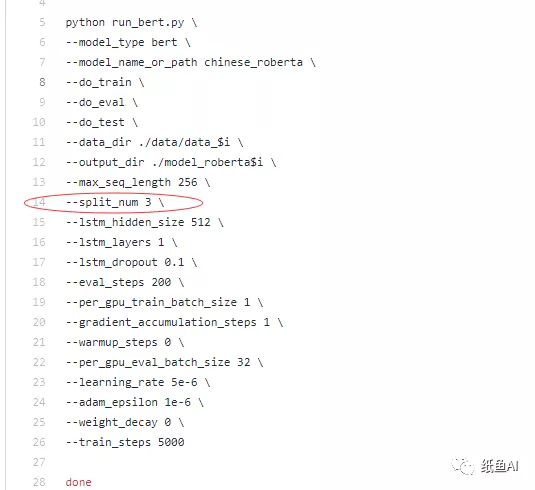

（4）使用多折交叉验证，多折交叉验证的效果会明显好于单折。多折交叉和融合往往都能带来一定的稳定性和性能的提升。不过多折也会增加训练的时长，所以往往在先调参确定好模型后再进行多折交叉。通过这个方法，线上就可以到达81.8了，当时已经在a榜前15了。


（5）使用roberta-wwm-ext模型，roberta-wwm-ext是一个基于全词遮罩（Whole Word Masking）技术的预训练模型。 简单来说，原有基于WordPiece的分词方式会把一个完整的词切分成若干个子词，在生成训练样本时，这些被分开的子词会随机被mask。在全词Mask中，如果一个完整的词的部分WordPiece子词被mask，则同属该词的其他部分也会被mask，即全词Mask。这个模型在复赛的a榜上效果比较好。这个应该是初赛和复赛训练数据集分布情况不同导致的。不过多样化的模型对于模型融合是很有帮助的。repo的链接如下：

https://github.com/ymcui/Chinese-BERT-wwm


（6）All data训练，在之前的训练中会使用一部分作为验证集，但是当你确定了所有超参数后你就可以尝试把所以数据拿过来盲跑，这样训练数据会多一点，不过缺点是拿不到本地的开发集测试结果。


## 模型融合

在得到两个模型的多个不同split_num，maxlen值后，就可以对模型的结果进行融合了，在融合中我使用的是分类问题中常用投票法。

总的来说就是用不同的模型输出结果进行投票，哪个结果的票多就选择哪个结果，如果票数一样，有0 label就选0，没有的话就选单模最好的模型。这里选0是因为之前的0样本在训练的时候比较少。


对于候选融合结果的选择我们采用的方法如下：
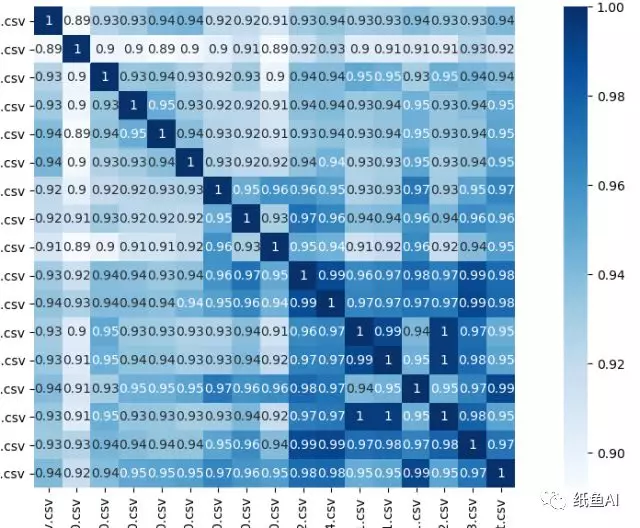

首先我们计算不同输出文件之间的相关性，然后选择相关性最小的几个输出结果，在相关性和得分上需要对不同的输出结果进行一个trade off。即最好的情况就是几个得分较高的模型相关性比较低。相关系数可以使用pandas中的corr()计算。


接着对选出的几个模型进行融合即可得到最后的输出，投票融合结果的代码框架如下：

In [ ]:
import pandas as pd
import numpy as np
submits =['0.818.csv','0.816.csv']
#需要融合的文件放submits中
files = []
data = []
for f in submits:
    if 'csv' in f:
        files.append(f)
        data.append(pd.read_csv(f).values)
print(len(files))

weight = [2,1]
#融合的权重
result = np.zeros([len(data[0]), 3])

for i in range(len(data)):
    for j in range(len(data[0])):
        if data[i][j][1] == 0:
            result[j][0] += weight[i]
        elif data[i][j][1] == 1:
            result[j][1] += weight[i]
        elif data[i][j][1] == 2:
            result[j][2] += weight[i]

np.argmax(result, axis = 1)
submit = pd.read_csv('submit_example.csv')
submit['label'] = np.argmax(result, axis = 1)
submit.to_csv('result.csv',index=None)

## 总结


其实比赛中还有很多方法可以尝试，不过中间有点事耽误了很多时间所以就尝试了两个模型，有点可惜，文章中有很多地方都还是可以调整的，比如融合方法等，大家有空可以继续探究。